In [6]:
import os

In [12]:
data_dir = '../DATA/cell_images'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from matplotlib.image import imread

In [14]:
test_path = data_dir+'/test/'
train_path = data_dir+'/train/'

In [15]:
test_path

'../DATA/cell_images/test/'

In [17]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [18]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [20]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [21]:
para_cell = train_path+'parasitized/'+ 'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [22]:
para_cell

'../DATA/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

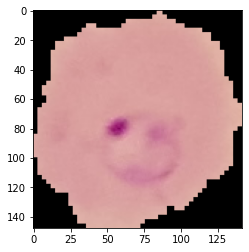

In [24]:
plt.imshow(imread(para_cell))

In [25]:
os.listdir(train_path+'uninfected')[0]


'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [26]:
uninfected_cell = train_path+'uninfected/'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'

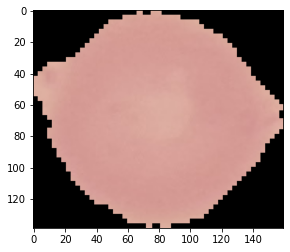

In [27]:
plt.imshow(imread(uninfected_cell))

**Count number of images**

In [28]:
len(os.listdir(train_path+'parasitized'))

12480

In [29]:
len(os.listdir(train_path+'uninfected'))

12480

In [30]:
len(os.listdir(test_path+'parasitized'))

1300

In [31]:
len(os.listdir(test_path+'uninfected'))

1300

**Find average size of images**

In [33]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    img = imread(test_path+'uninfected/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

c:\users\ayomi\anaconda3\envs\my_rl_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


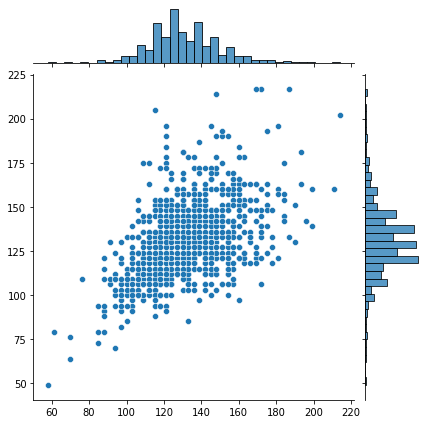

In [34]:
sns.jointplot(dim1, dim2)

In [35]:
np.mean(dim1)

130.92538461538462

In [36]:
np.mean(dim2)

130.75

In [37]:
image_shape = (130,130,3)

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
# help(ImageDataGenerator)

In [42]:
image_gen = ImageDataGenerator(rotation_range=20, 
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

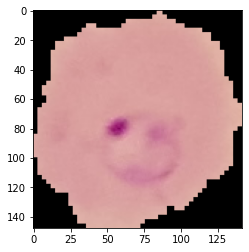

In [45]:
para_img = imread(para_cell)
plt.imshow(para_img)

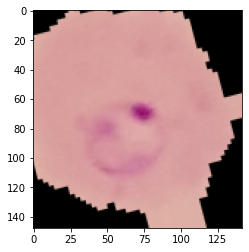

In [50]:
plt.imshow(image_gen.random_transform(para_img))

In [51]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [52]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [53]:
from tensorflow.keras.models import Sequential

In [56]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [58]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

In [61]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [62]:
batch_size=16

In [64]:
train_image_gen = image_gen.flow_from_directory(train_path, 
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [65]:
test_image_gen = image_gen.flow_from_directory(test_path, 
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [66]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [67]:
results = model.fit_generator(train_image_gen, epochs=20,
                             validation_data=test_image_gen,
                             callbacks=[early_stop])

c:\users\ayomi\anaconda3\envs\my_rl_env\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1560/1560 [==============================] - 474s 303ms/step - loss: 0.9097 - accuracy: 0.5401 - val_loss: 0.6906 - val_accuracy: 0.5373
Epoch 2/20
1560/1560 [==============================] - 267s 171ms/step - loss: 0.6834 - accuracy: 0.5649 - val_loss: 0.6729 - val_accuracy: 0.5831
Epoch 3/20
1560/1560 [==============================] - 252s 161ms/step - loss: 0.6764 - accuracy: 0.5833 - val_loss: 0.6633 - val_accuracy: 0.5996
Epoch 4/20
1560/1560 [==============================] - 240s 154ms/step - loss: 0.2969 - accuracy: 0.8847 - val_loss: 0.2176 - val_accuracy: 0.9281
Epoch 5/20
1560/1560 [==============================] - 261s 167ms/step - loss: 0.1891 - accuracy: 0.9417 - val_loss: 0.1740 - val_accuracy: 0.9458
Epoch 6/20
1560/1560 [==============================] - 250s 160ms/step - loss: 0.1751 - accuracy: 0.9466 - val_loss: 0.1609 - val_accuracy: 0.9454
Epoch 7/20
1560/1560 [==============================] - 266s 170ms/step - loss: 0.1714 - accuracy: 0.9476 - val_

In [69]:
model.evaluate_generator(test_image_gen)

c:\users\ayomi\anaconda3\envs\my_rl_env\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.17751376330852509, 0.9419230818748474]

In [70]:
model.metrics_names

['loss', 'accuracy']

In [71]:
pred = model.predict_generator(test_image_gen)

c:\users\ayomi\anaconda3\envs\my_rl_env\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [80]:
predictions = pred > 0.5

In [78]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [74]:
len(pred)

2600

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1300
           1       0.92      0.97      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [82]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1186,  114],
       [  35, 1265]], dtype=int64)

In [83]:
from tensorflow.keras.preprocessing import image

In [87]:
my_image = image.load_img(para_cell, target_size=image_shape)

In [88]:
#model.summary()

In [89]:
my_image_array = image.img_to_array(my_image)

In [92]:
my_image_array.shape # should be (1, 130, 130, 3)

(130, 130, 3)

In [94]:
my_image_array = np.expand_dims(my_image_array, axis=0)

In [96]:
my_image_array.shape

(1, 130, 130, 3)

In [97]:
model.predict(my_image_array)

array([[0.00974655]], dtype=float32)